In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("iris.csv")

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [10]:
#to display stats about data set
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# to display basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
# to display number of samples of each class
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [16]:
# to check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

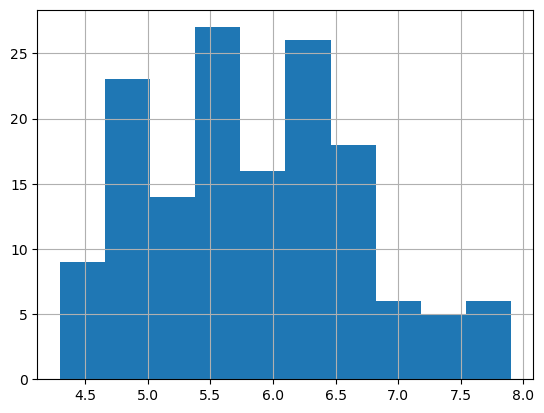

In [18]:
#for plot histogram
df["sepal_length"].hist()

<Axes: >

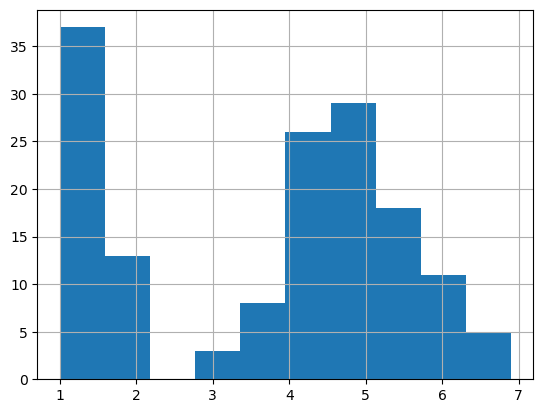

In [20]:

df["petal_length"].hist()

<Axes: >

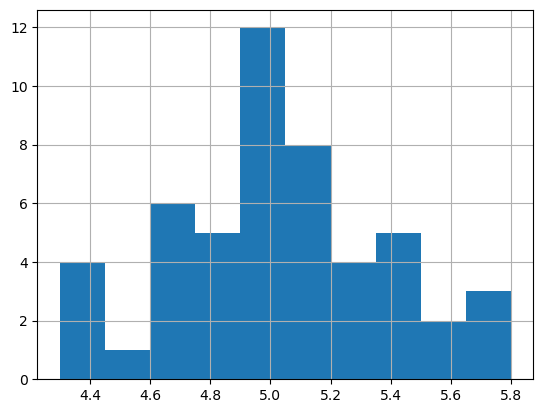

In [22]:
# to print graph for a particular species
df[df["species"]=="setosa"]["sepal_length"].hist()

<Axes: >

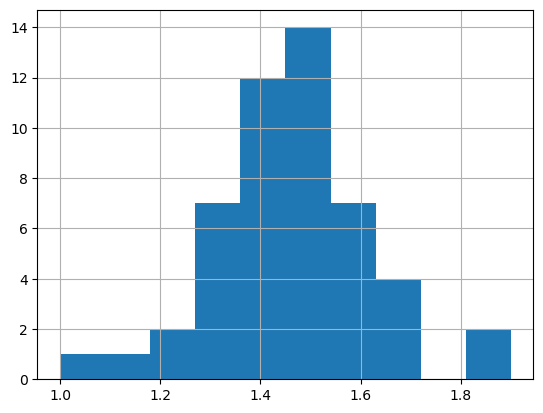

In [24]:
df[df["species"]=="setosa"]["petal_length"].hist()

In [26]:
df=sns.load_dataset("iris")



In [28]:
#for sctter a plot
colors = ["red","orange","blue"]
species = df['species'].unique()

In [30]:
#for sctter a plot
colors = ["red","orange","blue"]
species = ["iris-setosa","iris-versicolor","iris-virginica"]

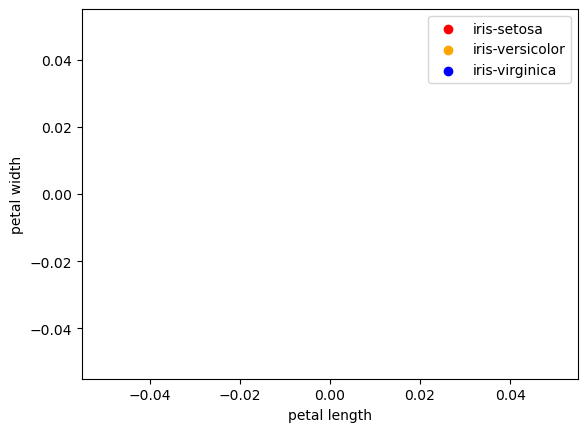

In [32]:
for i in range(3):
    z = df[df["species"] == species[i]]
    plt.scatter(z["petal_length"], z["petal_width"], c = colors[i], label = species[i])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()#colouring
plt.show()

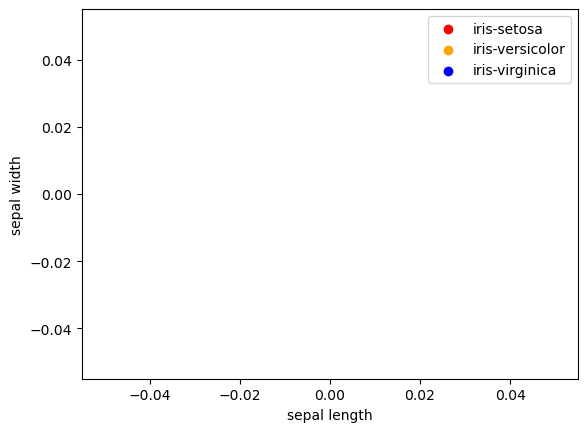

In [36]:
for i in range(3):
    z = df[df["species"] == species[i]]
    plt.scatter(z["sepal_length"], z["sepal_width"], c = colors[i], label = species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()#colouring
plt.show()

In [38]:
df=sns.load_dataset("iris")

In [42]:
corr=df.select_dtypes(include="number").corr()

In [48]:
from sklearn.datasets import load_iris

In [50]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df["species"]=pd.Categorical.from_codes(iris.target,iris.target_names)

In [52]:
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [56]:
correlation_matrix=iris_df.corr()


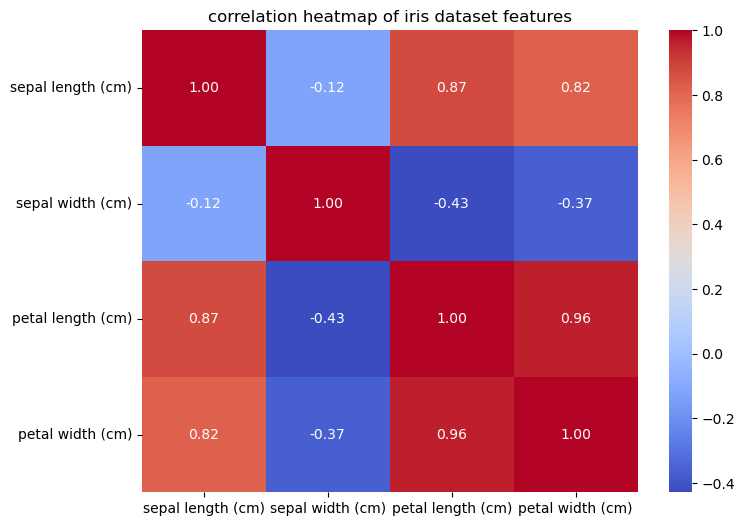

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation heatmap of iris dataset features")
plt.show()

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [62]:
df["species"]=le.fit_transform(df["species"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
from sklearn.model_selection import train_test_split
#train 70% , test 30%
x=df.drop(columns=["species"]) 
y=df["species"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [66]:
#logisticregration
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [68]:
#model training
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [70]:
# to print martic to get performance
print("accuracy:",model.fit(x_train,y_train))

accuracy: LogisticRegression(max_iter=1000)


In [72]:
print("accuracy:",model.score(x_train,y_train)*100)

accuracy: 98.09523809523809


In [74]:
#knn k nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [76]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [78]:
print("accuracy:",model.score(x_test,y_test))

accuracy: 0.9555555555555556


In [80]:
print("accuracy:",model.score(x_test,y_test)*100)

accuracy: 95.55555555555556


In [82]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [84]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [86]:
print("accuracy:",model.score(x_test,y_test)*100)


accuracy: 95.55555555555556
